<a href="https://colab.research.google.com/github/abubakarkhanlakhwera/GenAI/blob/main/pytorch/pytorch_autograd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **What is Autograd**



> Autograd is a core component of PyTorch that provides automatic
  differentiation for tensor
  operations. It enables gradient computation, which is essential for training machine learning
  models using optimization algorithms like gradient descent.
  It helps to resuce loss.


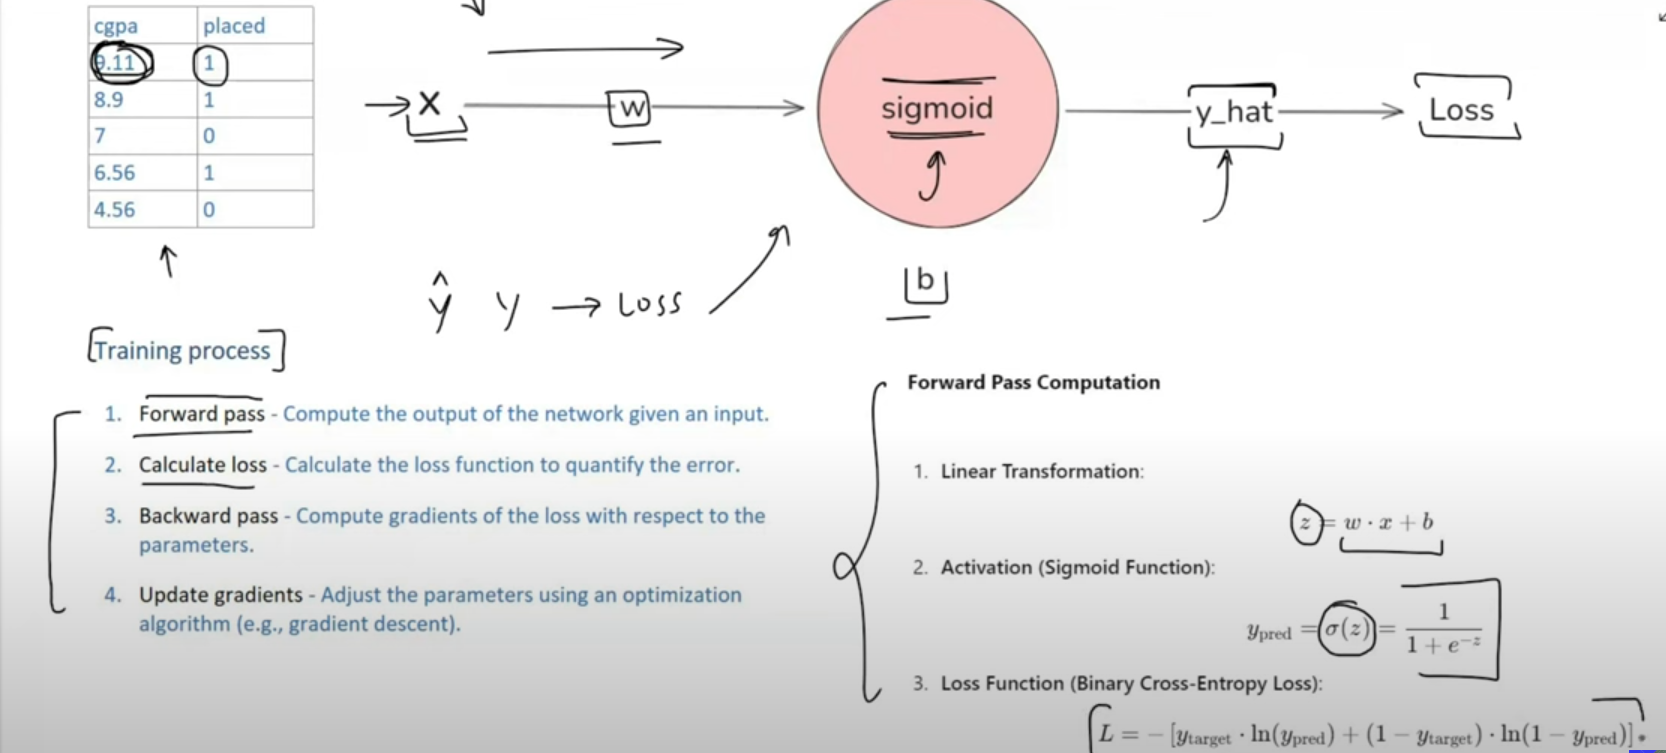

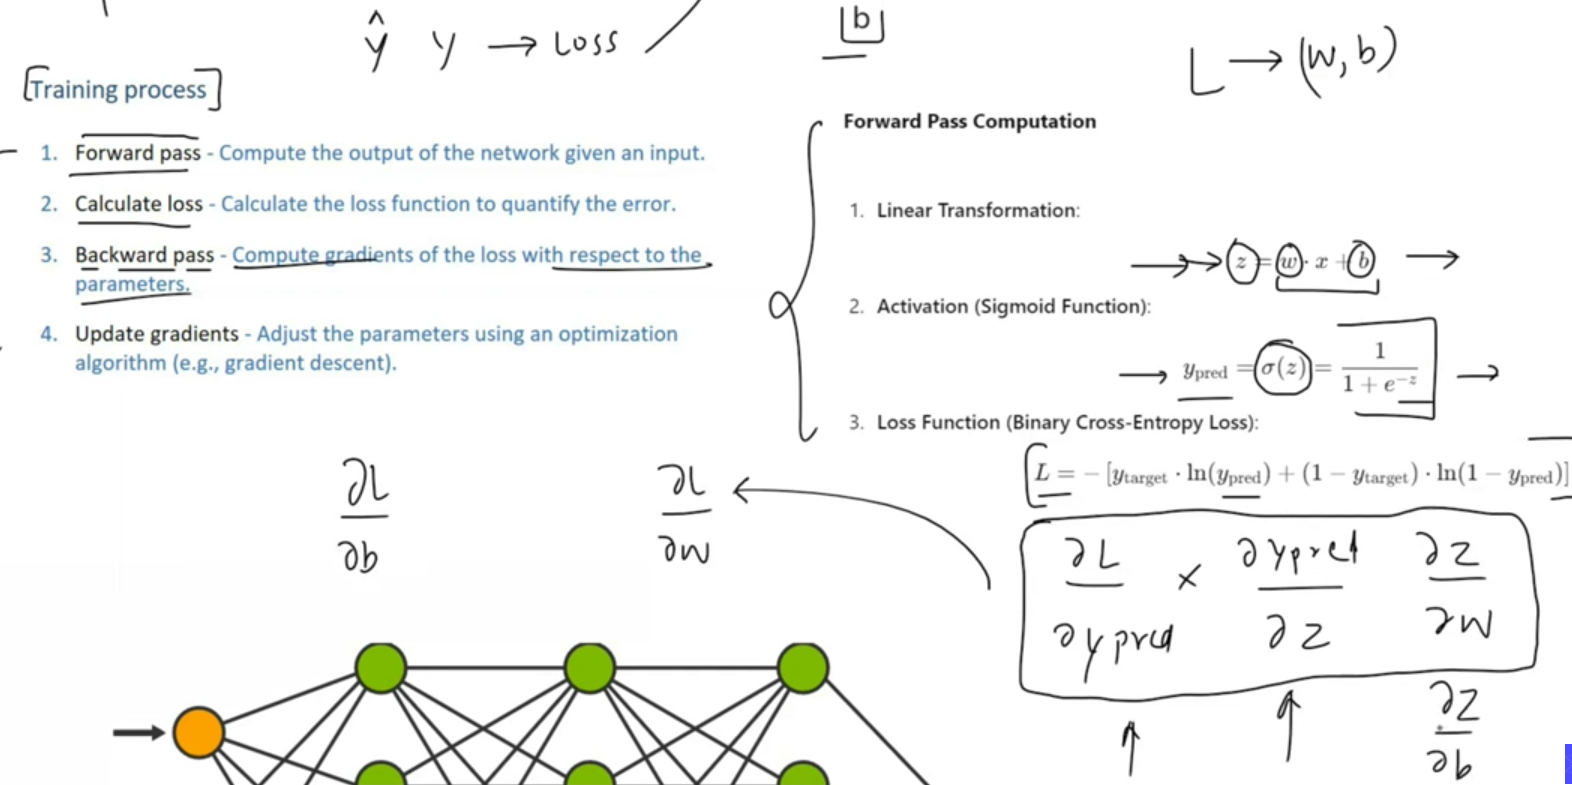

# **Example 1**

In [1]:
import torch

In [3]:
x = torch.tensor(3.0, requires_grad=True)
x

tensor(3., requires_grad=True)

In [5]:
y = x ** 2
y

tensor(9., grad_fn=<PowBackward0>)

In [6]:
y.backward()

In [7]:
x.grad

tensor(6.)

# **Example 2**

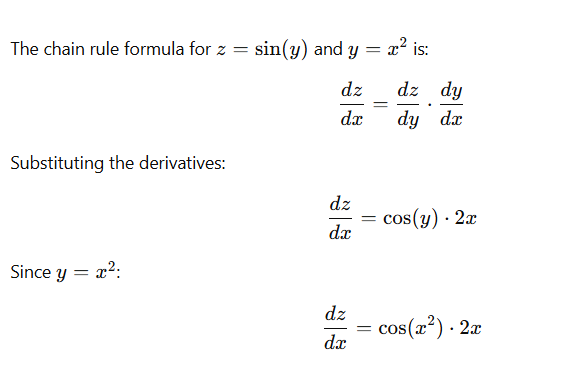y =

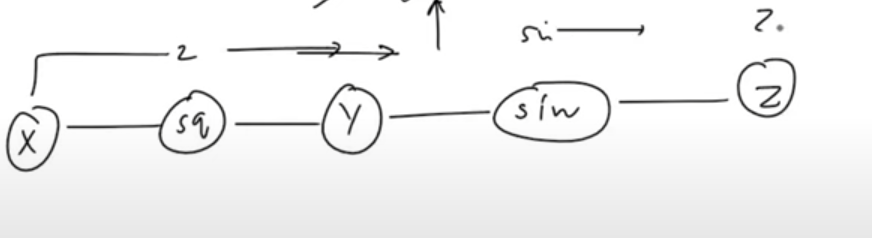

In [8]:
# direct derivative
import math

def dz_dx(x):
  return 2 * x * math.cos(x ** 2)

In [10]:
dz_dx(3)

-5.466781571308061

In [18]:
# derivative by pytorch
x = torch.tensor(3.,requires_grad=True)


In [19]:
y = torch.tensor(9., requires_grad=True)


In [20]:
x

tensor(3., requires_grad=True)

In [21]:
y = x ** 2
y

tensor(9., grad_fn=<PowBackward0>)

In [22]:
z = torch.sin(y)
z

tensor(0.4121, grad_fn=<SinBackward0>)

In [23]:
z.backward()

In [24]:
x.grad

tensor(-5.4668)

# **Example 3**

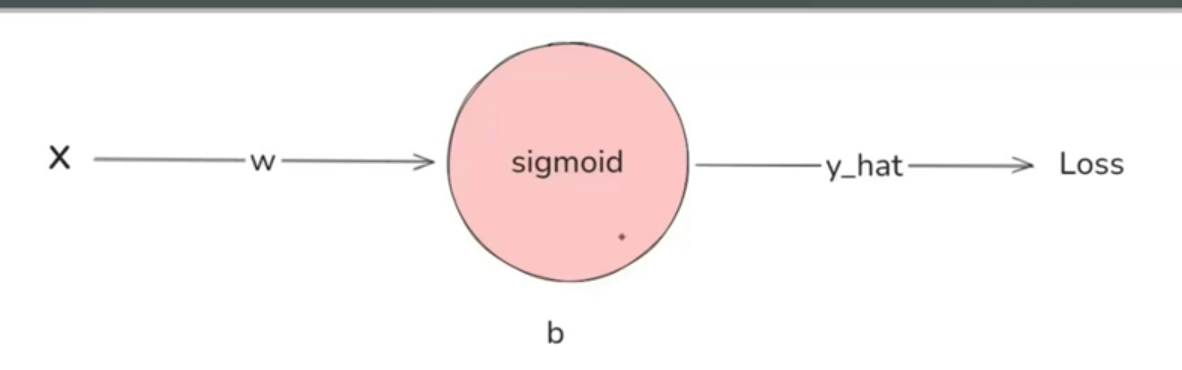

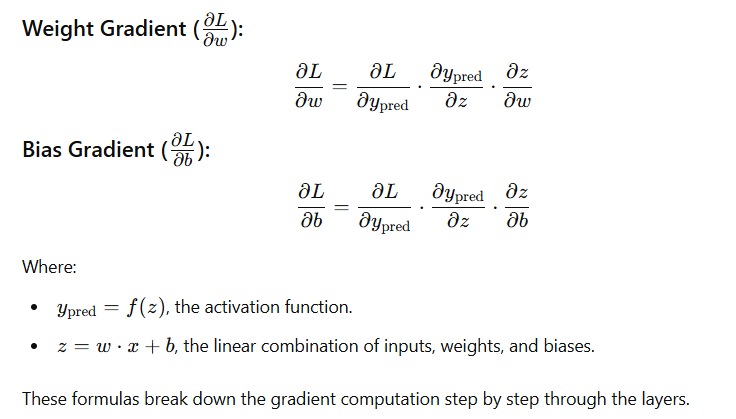

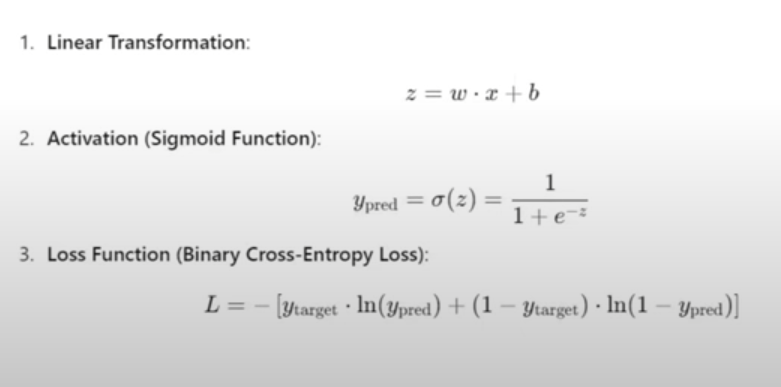

**eq(1) Linear Transformation**

In [30]:
# Inputs
x = torch.tensor(6.7) # Input feature
y = torch.tensor(0.0) # True label(binary)

w = torch.tensor(1.0) # weight
b = torch.tensor(0.0) # bias

In [31]:
# Binary Cross-Entropy Loss for scalar
def binary_cross_entropy_loss(prediction, target):
  epsilon = 1e-8 # to prevent log(0)
  prediction = torch.clamp(prediction, epsilon, 1 - epsilon)
  return -(target * torch.log(prediction) + (1 - target) * torch.log(1 - prediction))

**eq(2) Activation (Sigmoid Function)**

In [32]:
# Forward pass
z = w * x + b # Weighted sum (linear part)
y_pred = torch.sigmoid(z) # Predicted probability

**eq(3) Loss Function (Binary Cross-Entropy Loss)**

In [33]:
# Compute binary cross-entropy loss
loss = binary_cross_entropy_loss(y_pred, y)

In [34]:
loss

tensor(6.7012)

In [35]:
# Derivatives:
# 1. Loss with respect to the prediction (y_pred)
dloss_dy_pred = (y_pred - y) / (y_pred * (1 - y_pred))

# 2. dy_pred/dz: Prediction (y_pred) with respect to z (sigmoid derivative)
dy_pred_dz = y_pred * (1 - y_pred)

# 3. dz/dw and dz/db: z with respect to w and b
dz_dw = x # dz/dw = x
dz_db = 1 # dz/db = 1 (bias contributes directly to z)

dL_dw = dloss_dy_pred * dy_pred_dz * dz_dw
dL_db = dloss_dy_pred * dy_pred_dz * dz_db



In [36]:
print(f'Manual Gradient of loss w.r.t weight (dw):{dL_dw}')
print(f'Manual Gradient of loss w.r.t weight (db):{dL_db}')

Manual Gradient of loss w.r.t weight (dw):6.691762447357178
Manual Gradient of loss w.r.t weight (db):0.998770534992218


# **Entry of Auto-grad**

In [37]:
x = torch.tensor(6.7)
y = torch.tensor(0.0)



In [38]:
w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)

In [39]:
w

tensor(1., requires_grad=True)

In [40]:
b

tensor(0., requires_grad=True)

In [42]:
z = w * x + b
z

tensor(6.7000, grad_fn=<AddBackward0>)

In [43]:
y_pred = torch.sigmoid(z)
y_pred

tensor(0.9988, grad_fn=<SigmoidBackward0>)

In [44]:
loss = binary_cross_entropy_loss(y_pred, y)
loss

tensor(6.7012, grad_fn=<NegBackward0>)

In [45]:
loss.backward()

In [46]:
w.grad

tensor(6.6918)

In [47]:
b.grad

tensor(0.9988)